In [1]:
import model
import numpy as np
from scipy.stats import linregress
from matplotlib import pyplot as plt

In [2]:
""" some additional functions for generating averaged plots """

def get_node_degrees(net, size):
    node_degrees = []
    times = []
    for i in range(size):
        k, t = net.get_degree_wrt_time(i)
        node_degrees.append(k)
        times.append(t)

    return times, node_degrees

def simulate(size, iterations, fitness):
    node_degrees = []
    times = []

    for i in range(iterations):
        network = model.network()
        network.set_fitness_from_data(fitness)
        network.generate_network(size, from_data=True)
        
        t, k = get_node_degrees(network, size)
        node_degrees.append(k)
        times.append(t)

    return times, node_degrees

def clone_shape(arr):
    res = []
    for x in arr:
        res.append(np.zeros_like(x))
    return res

def get_means(arr):
    summ = clone_shape(arr[0])
    for i in range(len(arr)):
        for j in range(len(arr[i])):
            for k in range(len(arr[i][j])):
                summ[j][k] += arr[i][j][k]

    means = [[value / len(arr) for value in subarr] for subarr in summ]

    return means

Text(0.5, 1.0, 'Fitness Distribution')

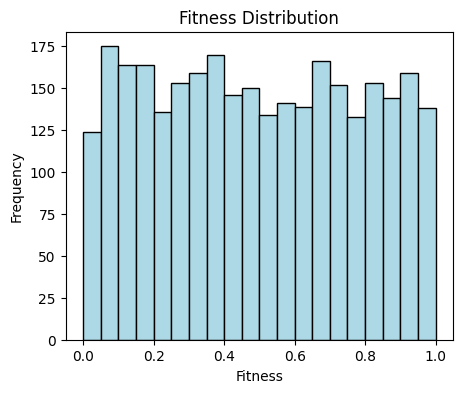

In [8]:
""" beta estimation on NOT averaged simulation (does not work properly) """

network = model.network()
network.set_fitness_distr('uniform')
size = 3000
G = network.generate_network(size)

data = G

fitness_values = [fitness for _, (_, fitness) in data.items()]

plt.figure(figsize=(5,4))
plt.hist(fitness_values, bins=20, color='lightblue', edgecolor='black')
plt.xlabel("Fitness")
plt.ylabel("Frequency")
plt.title("Fitness Distribution")

C:\Users\Leont\AppData\Local\Temp\ipykernel_20964\1830767605.py:14: RuntimeWarning: divide by zero encountered in log
  lnt = [np.log(t) for t in times]


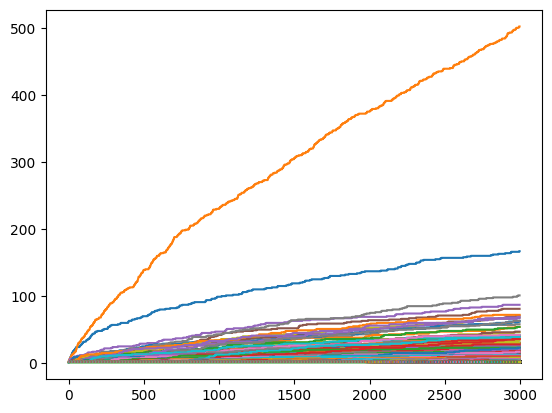

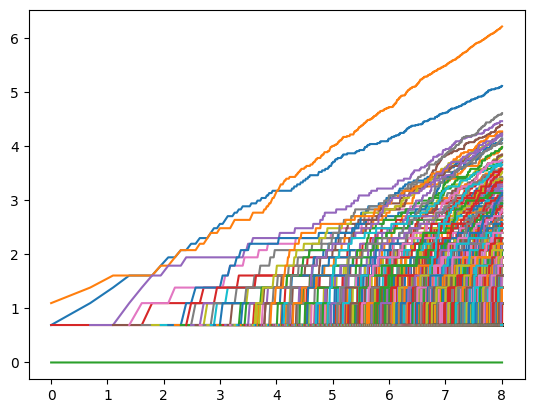

In [9]:
""" Degree dynamics over time for each node """

node_degrees = []
times = []
for i in range(size):
    k, t = network.get_degree_wrt_time(i)
    node_degrees.append(k)
    times.append(t)

for i in range(len(times)):
    plt.plot(times[i], node_degrees[i])

lnk = [np.log(x) for x in node_degrees]
lnt = [np.log(t) for t in times]

plt.figure()
for i in range(len(lnk)):
    plt.plot(lnt[i], lnk[i])
    

In [5]:
def estimate_beta(degrees, times):
    lnk = [np.log(x) for x in degrees]
    lnt = [np.log(t) for t in times]

    # Estimating betas using linear regression
    beta = []
    for i in range(len(lnk)):
        if len(lnk[i]) < 10:
            continue

        slope, intercept, _, _, _ = linregress(lnt[i], lnk[i])
    
        if slope > 0:
            beta.append(slope)
    
    return beta

C:\Users\Leont\AppData\Local\Temp\ipykernel_20964\3917182519.py:3: RuntimeWarning: divide by zero encountered in log
  lnt = [np.log(t) for t in times]


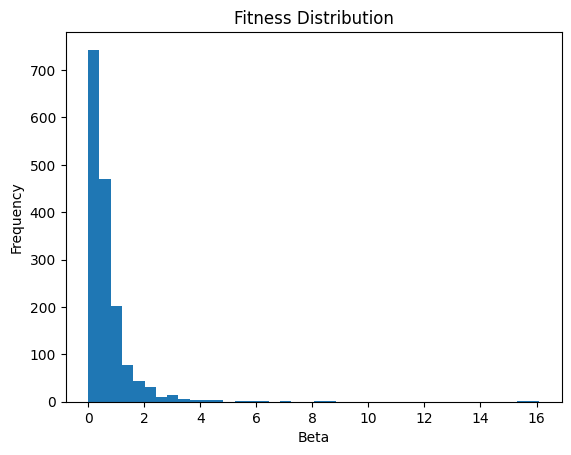

In [11]:
""" the distribution here must be approximately uniform from 0 to 1 """

degrees_new, times_new = node_degrees, times

beta = estimate_beta(degrees_new, times_new)

# Plotting the fitness (beta) distribution histogram
plt.figure()
plt.hist(beta, bins=40)
plt.xlabel('Beta')
plt.ylabel('Frequency')
plt.title('Fitness Distribution')
plt.show()

In [18]:
""" beta estimation on averaged simulation

    estimation is far from good for uniform, but seems to work overall """

size = 3000
iterations = 100
rng = np.random.default_rng(1234)
fitness_data = rng.random(size)

times, node_degrees = simulate(size, iterations, fitness_data)

mean_degrees = get_means(node_degrees)

C:\Users\Leont\AppData\Local\Temp\ipykernel_14276\3917182519.py:3: RuntimeWarning: divide by zero encountered in log
  lnt = [np.log(t) for t in times]


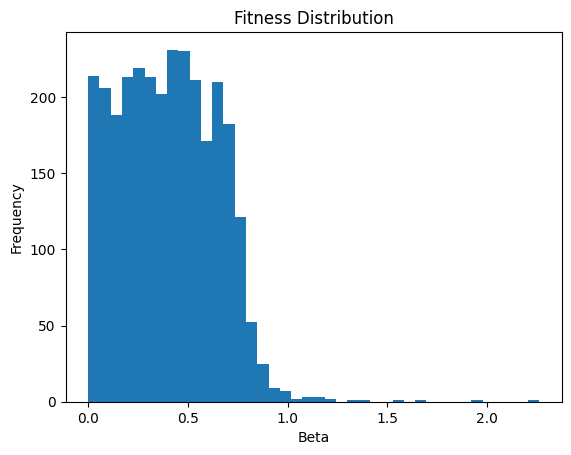

In [19]:
degrees_new, times_new = mean_degrees, times[0]

beta = estimate_beta(degrees_new, times_new)

# Plotting the fitness (beta) distribution histogram
plt.figure()
plt.hist(beta, bins=40)
plt.xlabel('Beta')
plt.ylabel('Frequency')
plt.title('Fitness Distribution')
plt.show()

In [22]:
""" for exponential fitness """

size = 3000
iterations = 100
rng = np.random.default_rng(1234)
fitness_data = rng.exponential(1.0, size)

times, node_degrees = simulate(size, iterations, fitness_data)

mean_degrees = get_means(node_degrees)

C:\Users\Leont\AppData\Local\Temp\ipykernel_14276\3917182519.py:3: RuntimeWarning: divide by zero encountered in log
  lnt = [np.log(t) for t in times]
C:\Users\Leont\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\numpy\lib\function_base.py:2699: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]


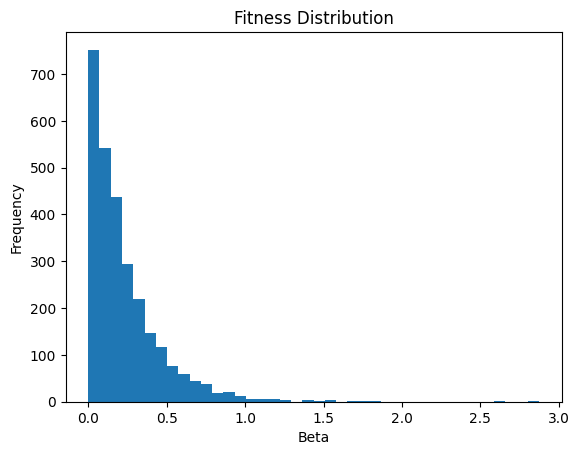

In [23]:
degrees_new, times_new = mean_degrees, times[0]

beta = estimate_beta(degrees_new, times_new)

plt.figure()
plt.hist(beta, bins=40)
plt.xlabel('Beta')
plt.ylabel('Frequency')
plt.title('Fitness Distribution')
plt.show()